## Lab 1

 **Name:** HARSH JOSHI  
**Student ID:** 8952840  
**Section Number:** 1

## Univariate Linear Regression on the California Housing Prices Dataset (8 points)

In this lab you will train your first machine learning model in our course - a univariate linear regression model. You are asked to run a linear regression between the median house value (dependent variable) and each of the following independent variables. You should run three models, one for each independent variable: 

median income
population
number of households
Step:

1. Framing the Problem - Describe the goal of this report (0.5 point).

The main target of the report is to find relation between median house value and other independent variables which are population, median income and number of households. In this linear regression will be used to identify relationship and prediction of housing prices.

In [104]:

import pandas as pd
location = r'C:\Users\joshi\Downloads\housing.csv\housing.csv'
data_housing = pd.read_csv(location)
data_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


EXPLORE DATA ANALYSIS (EDA)

Descriptive stats:
This table describes a summary for this dataset

In [105]:

data_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [106]:

minimum = data_housing['median_house_value'].min()
maximum = data_housing['median_house_value'].max()

print(f"The value of house median is from ${minimum} to ${maximum}.")

The value of house median is from $14999.0 to $500001.0.


Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual interpretation of the graphs, and insights specific to the linear regression you are going to conduct next.


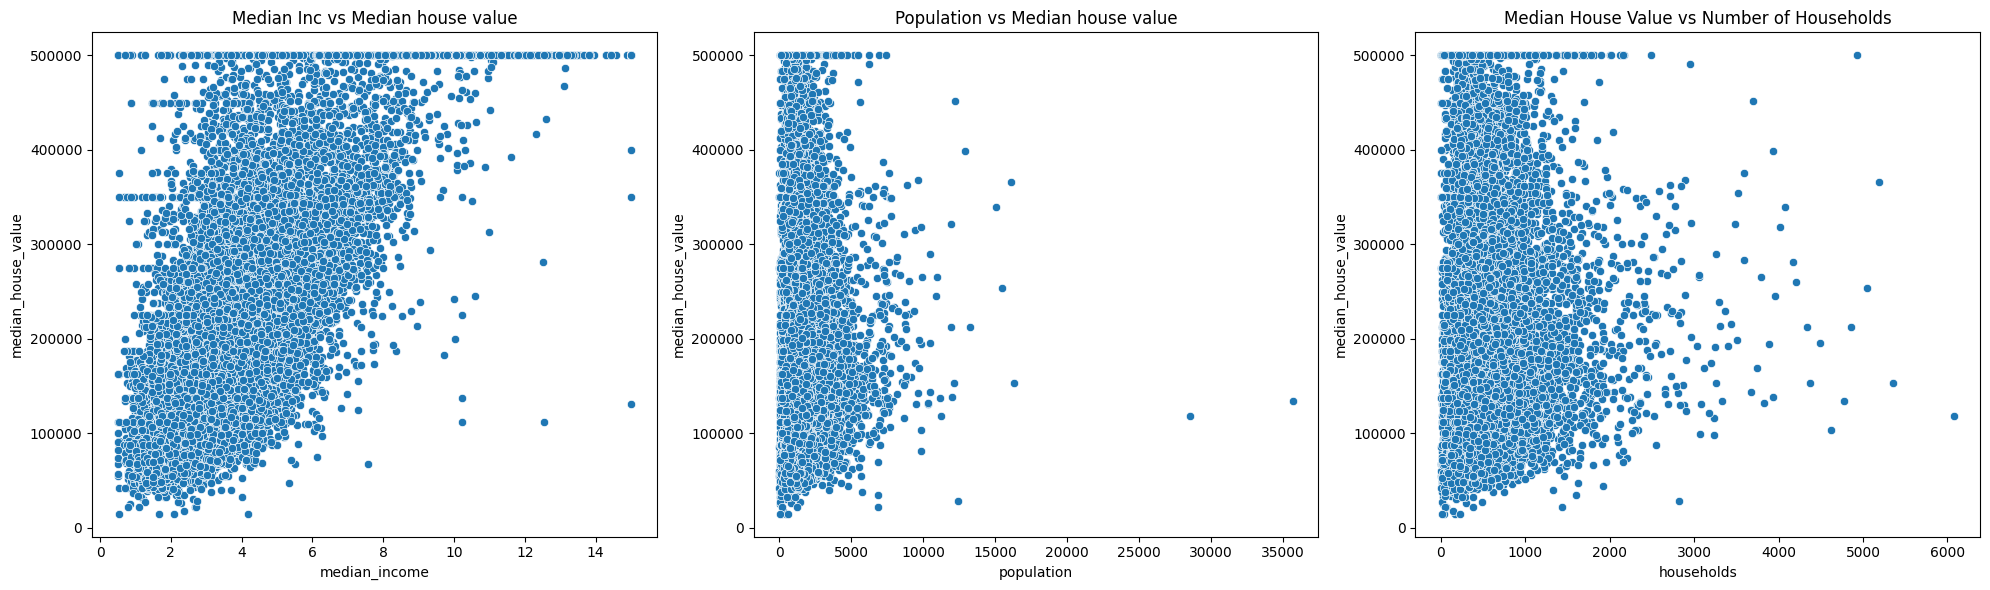

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x='median_income', y='median_house_value', data=data_housing)
plt.title('Median Inc vs Median house value')

plt.subplot(1, 3, 3)
sns.scatterplot(x='households', y='median_house_value', data=data_housing)
plt.title('Median House Value vs Number of Households')

plt.subplot(1, 3, 2)
sns.scatterplot(x='population', y='median_house_value', data=data_housing)
plt.title('Population vs Median house value')



plt.tight_layout()
plt.show()

3. Based on the above, describe the 4 variables used in this lab. Observations such as their meaning, range and additional characteristics that you notice. This should be concise, and relevant (1 point).

Ans: i.Population: This specific variable describes the group of people in a block
    ii.Median Income: This specific variable describe the household income of this area
    iii.Household: This variable describes the total household in a group
    iv.Median House Value: This sepcifically is ranged between 15000 dollars to 500000 dollars 

LINEAR REGRESSION MODEL:

For linear regression we are using three models
1. Mean squared error(MSE) and Mean absolute error(MAE)
2. slope and intercept

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


def linear_regression(a, b):
    data_model = LinearRegression()
    data_model.fit(a, b)
    yprediction = data_model.predict(a)
    mse = mean_squared_error(b, yprediction)
    mae = mean_absolute_error(b, yprediction)
    return data_model.intercept_, data_model.coef_[0], mse, mae

inc = data_housing[['median_income']]
pop = data_housing[['population']]
houshold = data_housing[['households']]
b = data_housing['median_house_value']

incresult = linear_regression(inc, b)
housholdresult = linear_regression(houshold, b)
popresult = linear_regression(pop, b)

print(incresult)
print(housholdresult)
print(popresult)


(np.float64(45085.5767032679), np.float64(41793.849201896286), np.float64(7011311502.929527), np.float64(62625.9337911434))
(np.float64(196928.57716233088), np.float64(19.872775155643875), np.float64(13257776904.728533), np.float64(90802.74324318448))
(np.float64(210436.26207627333), np.float64(-2.511752774615085), np.float64(13307412412.389355), np.float64(91153.82009473183))


### OUTPUT

| MODELS                       | SLOPE | INTERCEPT    | MSE          | MAE        |
|-----------------------------|-----------|----------|--------------|------------|
| Median House Value vs Income | 41793.85 | 45085.58 | 62625.93     | 70113.12   |
| Median House Value vs Households | 19.87 | 196928.58   | 90802.74     | 132577.77  |
| Median House Value vs Population | -2.51 | 210436.26   | 91153.82     | 138074.21  |


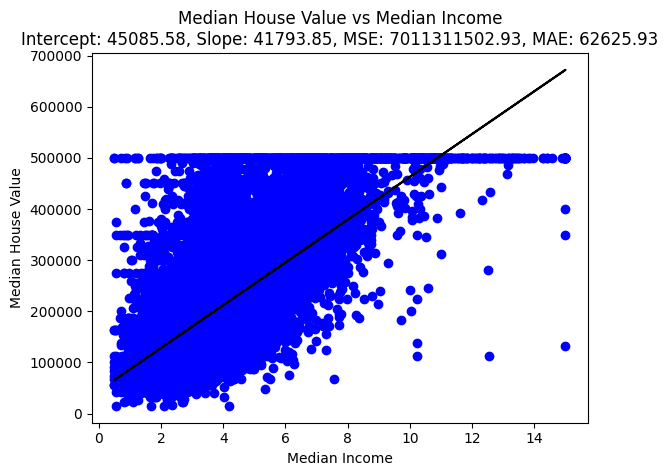

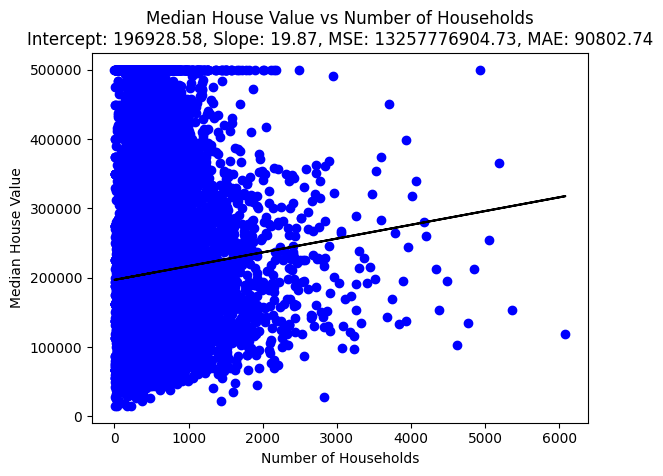

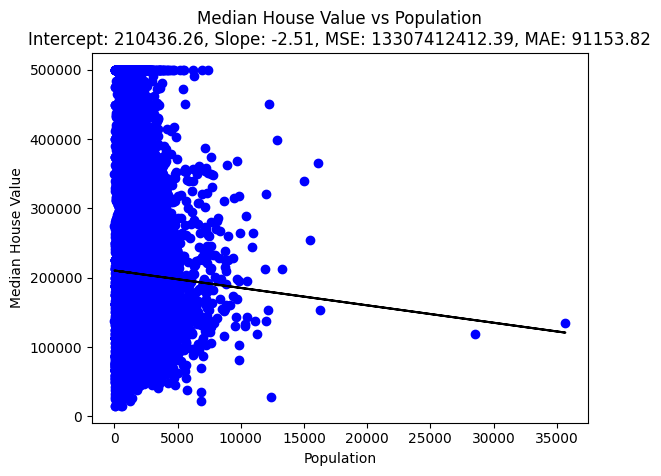

In [109]:
def regression(a, b, intercept, slope, mse, mae, title, xlabel):
    plt.scatter(a, b, color='blue')
    plt.plot(a, intercept + slope * a, color='black') # Plot the regression line
    plt.title(f'{title}\nIntercept: {intercept:.2f}, Slope: {slope:.2f}, MSE: {mse:.2f}, MAE: {mae:.2f}')
    plt.xlabel(xlabel)
    plt.ylabel('Median House Value')
    plt.show()

regression(data_housing['median_income'], b, incresult[0], incresult[1], incresult[2], incresult[3], 
                     'Median House Value vs Median Income', 'Median Income')

regression(data_housing['households'], b, housholdresult[0], housholdresult[1], housholdresult[2], housholdresult[3], 
                     'Median House Value vs Number of Households', 'Number of Households')

regression(data_housing['population'], b, popresult[0], popresult[1], popresult[2], popresult[3], 
                     'Median House Value vs Population', 'Population')




## SUMMARY:


Based on the models we can compare that:

1. Median housevalue vs median income:
This is so far the perfect fit and it doesnt show much errors. And it also defines the relation between housevalue and income positively.

2. Number of household vs Median housevalue:
This does show some error in it although household seem to show some nice predictions but still not the better one than the income.

3. Median housevalue vs Population:
This so far shows the worst corelation and it contains some high error rates and so far it can be conclude that population does not have any strong predictions.